In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sb
import time
#from ipywidgets import interact, fixed
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from libs.CovidDatasets import JHUDataset as LegacyJHUDataset
from libs.datasets import JHUDataset
from libs.datasets import FIPSPopulation
from libs.datasets import DHBeds
from libs.datasets.dataset_utils import AggregationLevel

from libs.ModelRun import ModelRun, prep_plot, report_months

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
state_list = ['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY',
              'LA', 'ME', 'MD', 'MH', 'MA', 'MI', 'FM', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 
              'OH', 'OK', 'OR', 'PW', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'VI', 'WA', 'WV', 'WI', 'WY']

In [5]:
print(len(state_list))

bad_list = ['AS', 'GU', 'MH', 'FM', 'MP', 'PW','VI']

state_list = [state for state in state_list if state not in bad_list]

print(len(state_list))

59
52


In [6]:
min_date = pd.to_datetime(datetime.datetime(2020, 1, 1))
epi_model = 'asymp'

beds_data = DHBeds.local().beds()
population_data = FIPSPopulation.local().population()

Could not match ('GU', 'Guam')
Could not match ('MP', 'Saipan')
Could not match ('AS', 'American Samoa')
Could not match ('VI', 'Saint Croix')
Could not match ('VI', 'Saint Thomas')


In [7]:
timeseries = JHUDataset.local().timeseries()

Did not match 49 codes to county data.
['00066', '00072', '00078', '60000', '66000', '69000', '78000', '80008', '80015', '80040', '88888', '90001', '90002', '90004', '90005', '90006', '90008', '90009', '90010', '90012', '90013', '90015', '90016', '90017', '90019', '90020', '90021', '90023', '90024', '90025', '90027', '90029', '90030', '90031', '90032', '90033', '90034', '90035', '90036', '90038', '90040', '90044', '90046', '90047', '90050', '90051', '90053', '90054', '90055']


In [8]:
#model_runs = {}

#for state in state_list:
#    model_runs[state] = ModelRun(state)

#    model_runs[state].get_data_subset(beds_data, population_data, timeseries, 'USA', state, min_date)
#    model_runs[state].set_epi_model(epi_model)

In [9]:
test = ModelRun('TX')

In [10]:
test.get_data_subset(beds_data, population_data, timeseries, min_date)
test.set_epi_model(epi_model)

In [11]:
test.epi_run.EpiParams.generate_r0()

3.1479999999999975

In [12]:
test.epi_run.InitConditions.mild

8195.0

In [13]:
test.epi_run.results

array([[8.19500000e+03, 9.86159667e+03, 1.17939403e+04, ...,
        2.19794060e-09, 2.13104967e-09, 2.00425297e-09],
       [8.19500000e+03, 7.76899687e+03, 7.57373293e+03, ...,
        2.24460257e-10, 1.24048045e-10, 4.20903836e-11],
       [1.63900000e+03, 1.63167140e+03, 1.61605879e+03, ...,
        8.11685771e-10, 7.45398372e-10, 6.67906952e-10],
       ...,
       [0.00000000e+00, 1.44733492e+03, 3.12367775e+03, ...,
        2.79635897e+07, 2.79635897e+07, 2.79635897e+07],
       [1.16000000e+02, 1.36404634e+02, 1.56647356e+02, ...,
        1.18410249e+05, 1.18410249e+05, 1.18410249e+05],
       [0.00000000e+00, 1.97231598e+03, 4.09038634e+03, ...,
        4.88264754e-09, 4.24613708e-09, 3.60465627e-09]])

In [14]:
test.epi_run.results_df

,exposed,infected_a,infected_b,infected_c,recovered,dead,asymp
2020-04-04,8195.00,8195.00,1639.00,409.75,0.00,116.00,0.00
2020-04-05,9861.60,7769.00,1631.67,406.47,1447.33,136.40,1972.32
2020-04-06,11793.94,7573.73,1616.06,403.23,3123.68,156.65,4090.39
2020-04-07,14084.78,7602.72,1600.39,399.93,5081.32,176.73,6404.57
2020-04-08,16824.87,7858.81,1591.58,396.67,7380.99,196.64,8978.78
...,...,...,...,...,...,...,...
2021-03-30,0.00,0.00,0.00,0.00,27963589.73,118410.25,0.00
2021-03-31,0.00,0.00,0.00,0.00,27963589.73,118410.25,0.00
2021-04-01,0.00,0.00,0.00,0.00,27963589.73,118410.25,0.00
2021-04-02,0.00,0.00,0.00,0.00,27963589.73,118410.25,0.00


In [15]:
int_test = {
    'name': 'test_intervention',
    'start_date': pd.to_datetime(datetime.datetime(2020, 4, 15)),
    'new_parameters': {
        'beta': 0.4,
        'beta_asymp': 0.6,
    }
}

test.add_intervention(int_test)

In [16]:
#test.interventions['intervention_TX_test_intervention'].InitConditions.y0

test.interventions['intervention_TX_test_intervention'].results_df

,exposed,infected_a,infected_b,infected_c,recovered,dead,asymp
2020-04-15,18019.85,18019.85,2211.66,411.63,41264.35,334.89,42708.04
2020-04-16,33578.29,17688.85,2416.09,426.86,49661.14,355.84,43143.19
2020-04-17,45558.67,18650.66,2600.83,445.53,58398.19,377.64,46471.65
2020-04-18,56131.48,20489.42,2801.29,467.23,67937.53,400.44,51815.37
2020-04-19,66546.30,23005.01,3038.45,492.35,78622.67,424.42,58766.75
...,...,...,...,...,...,...,...
2021-04-10,0.00,0.00,0.00,0.00,26863993.53,113772.47,0.00
2021-04-11,0.00,0.00,0.00,0.00,26863993.53,113772.47,0.00
2021-04-12,0.00,0.00,0.00,0.00,26863993.53,113772.47,0.00
2021-04-13,0.00,0.00,0.00,0.00,26863993.53,113772.47,0.00


first case
2020-04-15 00:00:00
peak in hospitalizations
2020-06-04T00:00:00.000000000
268,304.34262334474
peak in icu
2020-06-11T00:00:00.000000000
55,182.0251860556
deaths
113,772.46624280991


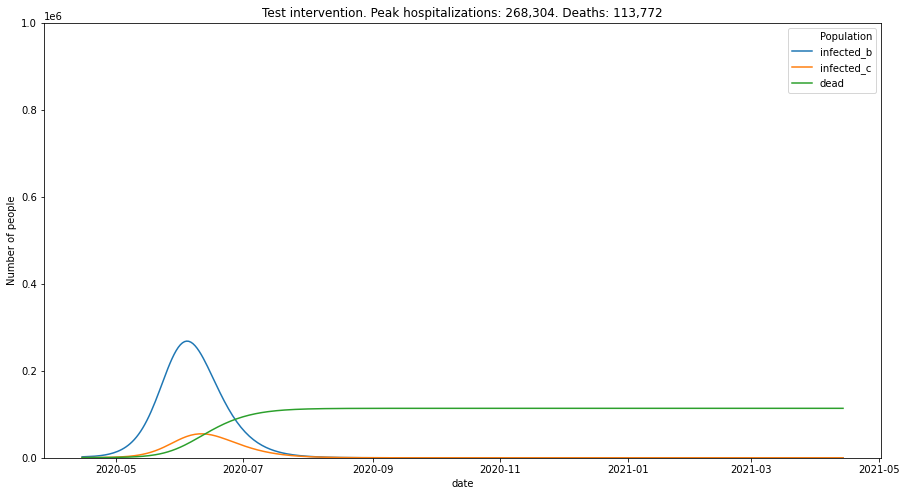

In [17]:
cols = ["infected_b", "infected_c", "dead"]

test_df = test.interventions['intervention_TX_test_intervention'].results_df.copy()
test_df.index.name = 'date'
test_df.reset_index(inplace=True)

test_df['infected'] = test_df.infected_a + test_df.infected_b + test_df.infected_c + test_df.asymp

prep_plot(test_df, cols, 'Test intervention', 1000000)